In [34]:
import pandas as pd
import numpy as np 
import re 
import matplotlib.pyplot as plt 
import seaborn as sns
from tabulate import tabulate
import missingno as msno
from scipy import stats

1. Load the dataset

In [46]:
df = pd.read_excel('Open_DATA_Import Janar-Dhjetor-2024.xlsx', sheet_name='IMPORT_1')
df.head()

,VITI,MUAJI,Regjimi,Origjina,Kodi Tarifor,Sasia,Vlera Mallrave,Netweight,Taksa Doganës,Taksa Akcizës,Taksa TVSH-së
0,2024,1,IM4,CN - KINA,8807100090 - Helikat dhe rotorët dhe pjesët e ...,NaN,786.21,1.00,78.62,0.0,155.67
1,2024,1,IM4,PL - POLONIA,8529101190 - Antenat teleskopike dhe të tipit ...,NaN,20.18,0.60,2.02,0.0,4.00
2,2024,1,IM4,CN - KINA,8806229090 - Me peshën maksimale të ngritjes m...,NaN,23763.00,34.24,2376.30,0.0,4705.08
3,2024,1,IM4,BG - BULLGARIA,8413703090 - Pompat forcuese glandless për sis...,20.0,4896.05,295.00,0.00,0.0,0.00
4,2024,1,IM4,DE - GJERMANIA,"9405618090 - Shenjat e ndriçimit, tabelat e nd...",NaN,3208.12,126.00,0.00,0.0,577.46


Dataset Description

| **Column**         | **Description**                                                                 |
|---------------------|---------------------------------------------------------------------------------|
| **VITI**           | Year of the transaction.                                                        |
| **MUAJI**          | Month of the transaction.                                                       |
| **Regjimi**        | Customs regime applied to the transaction.                                      |
| **Origjina**       | Country or region of origin of the goods.                                       |
| **Kodi Tarifor**   | Tariff code (HS code) classifying the goods.                                    |
| **Sasia**          | Quantity of goods traded.                                                       |
| **Vlera Mallrave** | Monetary value of the goods.                                                    |
| **Netweight**      | Net weight of the goods (excluding packaging).                                  |
| **Taksa Doganës**  | Customs duty applied to the goods.                                              |
| **Taksa Akcizës**  | Excise duty applied to specific goods (e.g., alcohol, tobacco).                 |
| **Taksa TVSH-së**  | Value Added Tax (VAT) applied to the goods.                                     |

Data inspect

In [47]:
print(df.info)

<bound method DataFrame.info of         VITI  MUAJI Regjimi        Origjina  \
0       2024      1     IM4       CN - KINA   
1       2024      1     IM4    PL - POLONIA   
2       2024      1     IM4       CN - KINA   
3       2024      1     IM4  BG - BULLGARIA   
4       2024      1     IM4  DE - GJERMANIA   
...      ...    ...     ...             ...   
233633  2024     12     IM4  DE - GJERMANIA   
233634  2024     12     IM4      IN - INDIA   
233635  2024     12     IM4     IT - ITALIA   
233636  2024     12     IM4       CN - KINA   
233637  2024     12     IM4    PL - POLONIA   

                                             Kodi Tarifor  Sasia  \
0       8807100090 - Helikat dhe rotorët dhe pjesët e ...    NaN   
1       8529101190 - Antenat teleskopike dhe të tipit ...    NaN   
2       8806229090 - Me peshën maksimale të ngritjes m...    NaN   
3       8413703090 - Pompat forcuese glandless për sis...   20.0   
4       9405618090 - Shenjat e ndriçimit, tabelat e nd...    Na

The dataset contains **233,638 entries (rows)** and **11 columns**.
The columns are of different data types:
- **Integer (int64):** `VITI`, `MUAJI`
- **Float (float64):** `Sasia`, `Vlera Mallrave`, `Netweight`, `Taksa Doganës`, `Taksa Akcizës`, `Taksa TVSH-së`
- **Object (string/categorical):** `Regjimi`, `Origjina`, `Kodi Tarifor`



In [49]:
df.describe()

,VITI,MUAJI,Sasia,Vlera Mallrave,Netweight,Taksa Doganës,Taksa Akcizës,Taksa TVSH-së
count,233638.0,233638.000000,7.294300e+04,2.336380e+05,2.336380e+05,2.336380e+05,2.336380e+05,2.336380e+05
mean,2024.0,6.634961,2.797952e+04,2.708681e+04,2.332468e+04,7.196629e+02,2.621695e+03,4.395679e+03
std,0.0,3.438751,6.357634e+05,2.529220e+05,4.405324e+05,9.445219e+03,1.291118e+05,6.060343e+04
min,2024.0,1.000000,1.000000e-02,0.000000e+00,5.000000e-03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2024.0,4.000000,4.065000e+00,2.425000e+02,1.000000e+01,0.000000e+00,0.000000e+00,2.798000e+01
50%,2024.0,7.000000,4.100000e+01,1.564370e+03,1.320000e+02,5.890000e+00,0.000000e+00,2.019600e+02
75%,2024.0,10.000000,5.939200e+02,9.675280e+03,1.782898e+03,9.960750e+01,0.000000e+00,1.306477e+03
max,2024.0,12.000000,6.315474e+07,3.772116e+07,5.145773e+07,1.015553e+06,2.256510e+07,1.084940e+07


#### **Count:**
- All columns (`VITI`, `MUAJI`, `Sasia`, `Vlera Mallrave`, `Netweight`, `Taksa Doganës`, `Taksa Akcizës`, `Taksa TVSH-së`) have **233,638 non-null entries**, except for `Sasia`, which has **72,943 non-null entries**. This indicates that the `Sasia` column has a significant number of missing values.

---

#### **Mean:**
- **`VITI`:** The mean value is **2024.0**, indicating that all transactions occurred in the year 2024.
- **`MUAJI`:** The mean value is **6.63**, suggesting that the average month of transactions is around June/July.
- **`Sasia`:** The mean quantity of goods traded is **27,979.52**, indicating a large volume of goods on average.
- **`Vlera Mallrave`:** The mean value of goods is **27,086.81**, showing a high average monetary value per transaction.
- **`Netweight`:** The mean net weight of goods is **23,324.68**, indicating heavy shipments on average.
- **`Taksa Doganës`:** The mean customs duty is **719.66**, suggesting moderate tax rates on average.
- **`Taksa Akcizës`:** The mean excise duty is **2,621.70**, indicating higher taxes on specific goods (e.g., alcohol, tobacco).
- **`Taksa TVSH-së`:** The mean VAT is **4,395.68**, showing a significant tax burden on goods.

---

#### **Standard Deviation (std):**
- **`VITI`:** The standard deviation is **0.0**, confirming that all transactions occurred in the same year (2024).
- **`MUAJI`:** The standard deviation is **3.44**, indicating moderate variability in the month of transactions.
- **`Sasia`:** The standard deviation is **635,763.40**, showing extremely high variability in the quantity of goods traded.
- **`Vlera Mallrave`:** The standard deviation is **252,921.97**, indicating high variability in the value of goods.
- **`Netweight`:** The standard deviation is **440,532.40**, showing extremely high variability in the net weight of goods.
- **`Taksa Doganës`:** The standard deviation is **9,445.22**, indicating significant variability in customs duties.
- **`Taksa Akcizës`:** The standard deviation is **129,111.77**, showing extremely high variability in excise duties.
- **`Taksa TVSH-së`:** The standard deviation is **60,603.43**, indicating significant variability in VAT.

---

#### **Minimum (min):**
- **`VITI`:** The minimum value is **2024**, confirming that all transactions occurred in 2024.
- **`MUAJI`:** The minimum value is **1**, indicating transactions occurred as early as January.
- **`Sasia`:** The minimum quantity of goods traded is **0.01**, showing very small transactions.
- **`Vlera Mallrave`:** The minimum value of goods is **0.0**, indicating some transactions have no monetary value.
- **`Netweight`:** The minimum net weight is **0.005**, showing very light shipments.
- **`Taksa Doganës`:** The minimum customs duty is **0.0**, indicating some transactions are duty-free.
- **`Taksa Akcizës`:** The minimum excise duty is **0.0**, indicating some goods are exempt from excise tax.
- **`Taksa TVSH-së`:** The minimum VAT is **0.0**, indicating some transactions are VAT-free.

---

#### **Quartiles (25%, 50%, 75%):**
- **`MUAJI`:**
  - 25% of transactions occurred by **April**, 50% by **July**, and 75% by **October**.
- **`Sasia`:**
  - 25% of transactions involve **4.06** units, 50% involve **41.0** units, and 75% involve **593.92** units.
- **`Vlera Mallrave`:**
  - 25% of transactions have a value of **242.5**, 50% have **1,564.37**, and 75% have **9,675.28**.
- **`Netweight`:**
  - 25% of shipments weigh **10.0**, 50% weigh **132.0**, and 75% weigh **1,782.90**.
- **`Taksa Doganës`:**
  - 25% of transactions have **0.0** customs duty, 50% have **5.89**, and 75% have **99.61**.
- **`Taksa Akcizës`:**
  - 25% of transactions have **0.0** excise duty, 50% have **0.0**, and 75% have **0.0**, indicating that most transactions are exempt from excise tax.
- **`Taksa TVSH-së`:**
  - 25% of transactions have **27.98** VAT, 50% have **201.96**, and 75% have **1,306.48**.

---

#### **Maximum (max):**
- **`VITI`:** The maximum value is **2024**, confirming all transactions occurred in 2024.
- **`MUAJI`:** The maximum value is **12**, indicating transactions occurred as late as December.
- **`Sasia`:** The maximum quantity of goods traded is **63,154,738.5**, indicating extremely large transactions.
- **`Vlera Mallrave`:** The maximum value of goods is **37,721,159.11**, indicating extremely high-value transactions.
- **`Netweight`:** The maximum net weight is **51,457,733.0**, indicating extremely heavy shipments.
- **`Taksa Doganës`:** The maximum customs duty is **1,015,552.62**, indicating very high tax rates for some transactions.
- **`Taksa Akcizës`:** The maximum excise duty is **22,565,098.44**, indicating extremely high taxes on specific goods.
- **`Taksa TVSH-së`:** The maximum VAT is **10,849,397.86**, indicating very high VAT for some transactions.

In [50]:
df.shape

(233638, 11)

- **Number of Rows (Observations)**: 233,638
- **Number of Columns (Features)**: 11

In [51]:
print(df.describe().T)

                   count          mean            std       min       25%  \
VITI            233638.0   2024.000000       0.000000  2024.000  2024.000   
MUAJI           233638.0      6.634961       3.438751     1.000     4.000   
Sasia            72943.0  27979.524529  635763.398873     0.010     4.065   
Vlera Mallrave  233638.0  27086.812414  252921.972771     0.000   242.500   
Netweight       233638.0  23324.680984  440532.397847     0.005    10.000   
Taksa Doganës   233638.0    719.662944    9445.218869     0.000     0.000   
Taksa Akcizës   233638.0   2621.695037  129111.766048     0.000     0.000   
Taksa TVSH-së   233638.0   4395.678829   60603.433861     0.000    27.980   

                    50%         75%          max  
VITI            2024.00  2024.00000      2024.00  
MUAJI              7.00    10.00000        12.00  
Sasia             41.00   593.92000  63154738.50  
Vlera Mallrave  1564.37  9675.28029  37721159.11  
Netweight        132.00  1782.89750  51457733.00  


In [52]:
df.describe(include=['O'])


,Regjimi,Origjina,Kodi Tarifor
count,233638,233638,233638
unique,1,194,6699
top,IM4,CN - KINA,3926909790 - Artikuj te tjere prej plastike
freq,233638,27784,595


In [53]:
duplicated=df.duplicated().sum()
print((duplicated/len(df))*100 , '%')

0.0 %


- **Number of Duplicated Rows**: `0`
- **Percentage of Duplicated Rows**: `0.0%`

In [55]:
# Check missing values in numerical columns
numerical_missing = df.select_dtypes(include=['number']).isnull().sum()
print(numerical_missing)

VITI                   0
MUAJI                  0
Sasia             160695
Vlera Mallrave         0
Netweight              0
Taksa Doganës          0
Taksa Akcizës          0
Taksa TVSH-së          0
dtype: int64


In [56]:
# Check missing values in categorical columns
categorical_missing = df.select_dtypes(include=['object', 'category']).isnull().sum()
print(categorical_missing)

Regjimi         0
Origjina        0
Kodi Tarifor    0
dtype: int64


<Axes: >

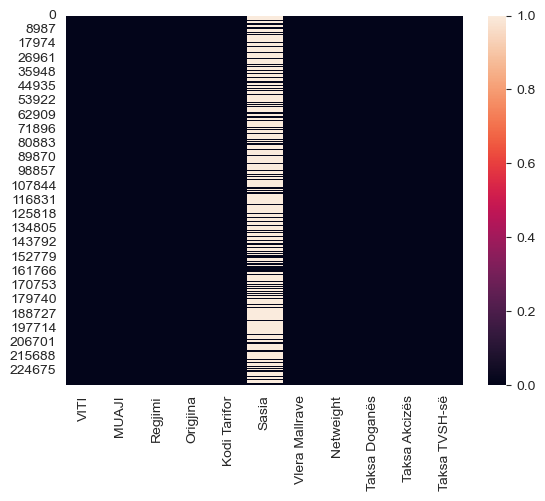

In [54]:
sns.heatmap(df.isnull())


Univariate Analysis

Univariate Analysis for Integer Columns

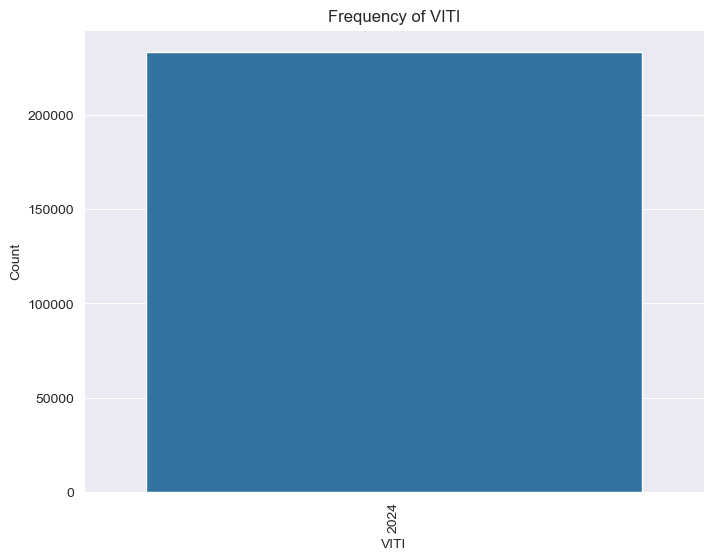

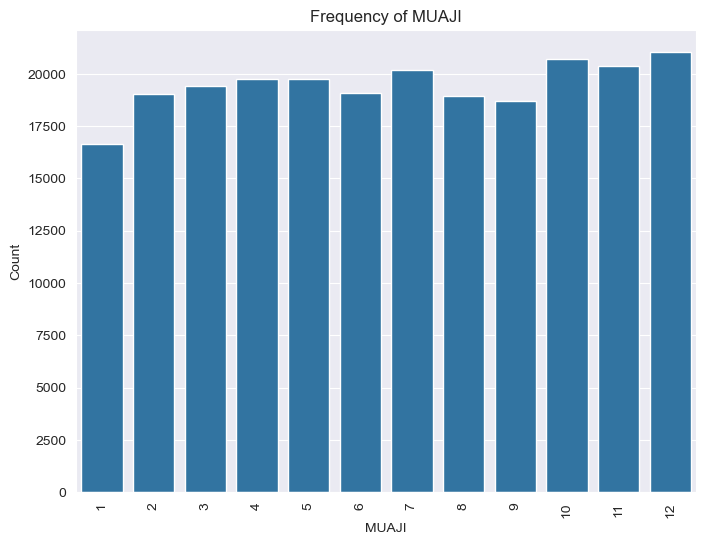

In [58]:
integer_columns = ['VITI', 'MUAJI']
for column in integer_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Frequency of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.show()

Univariate Analysis for Float Columns


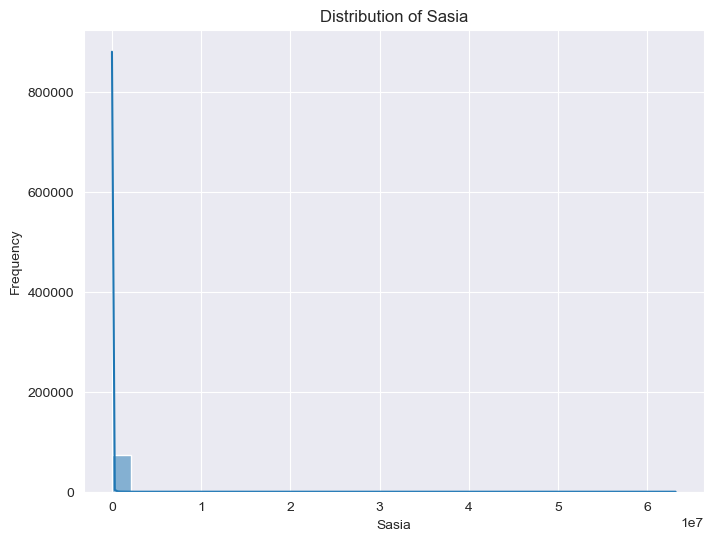

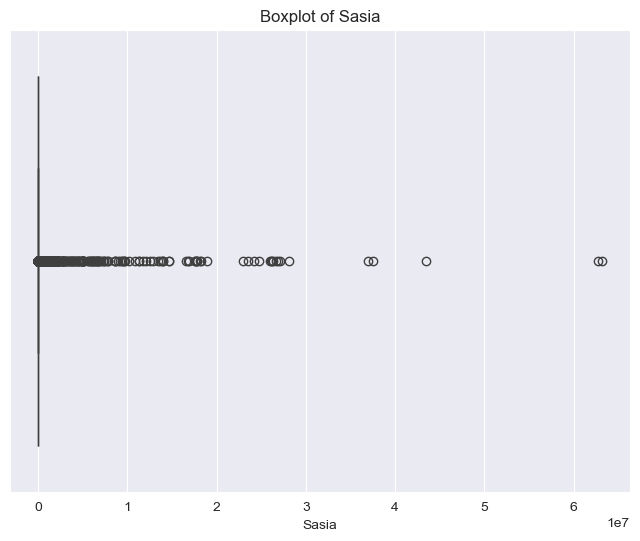

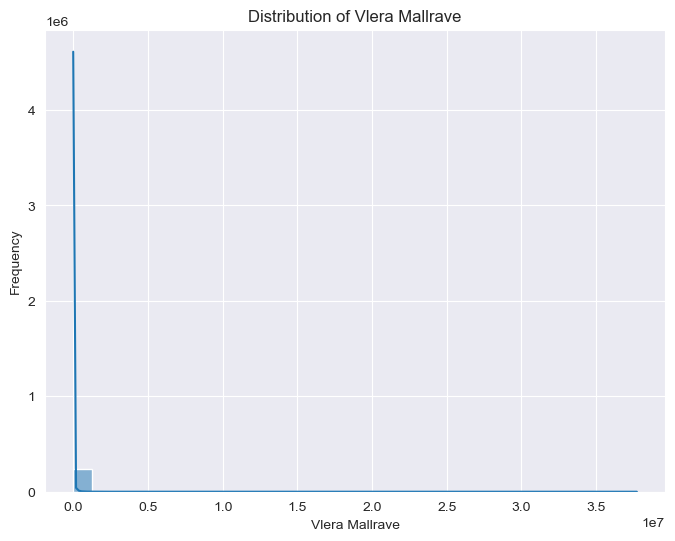

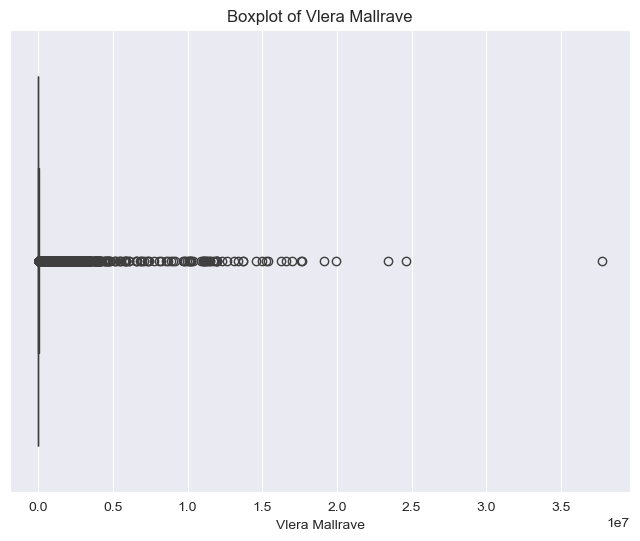

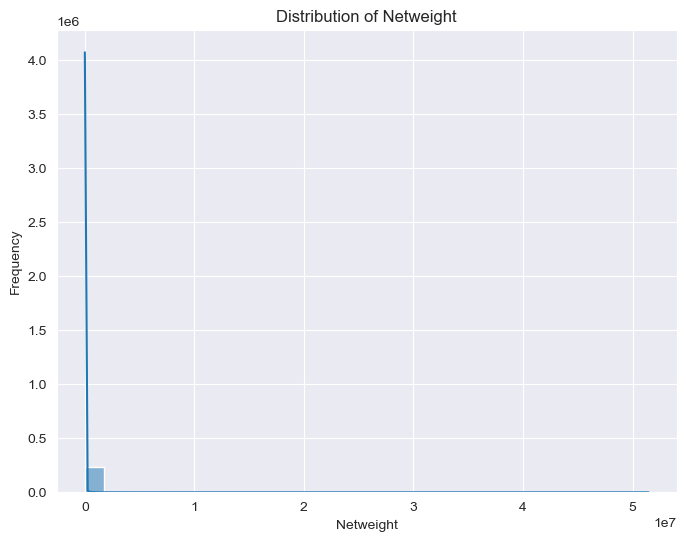

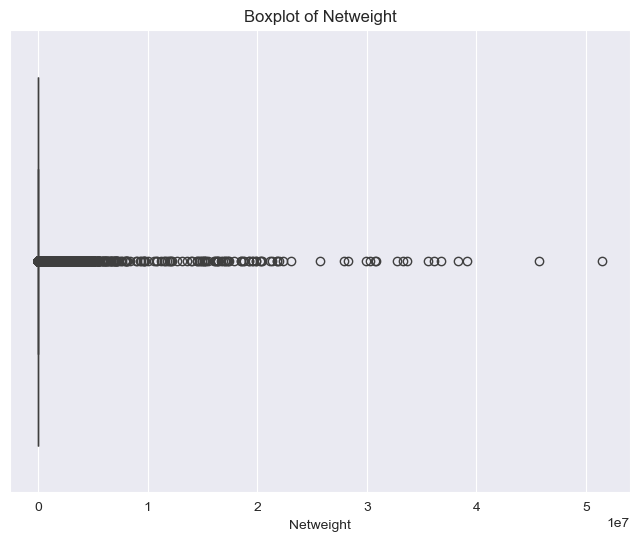

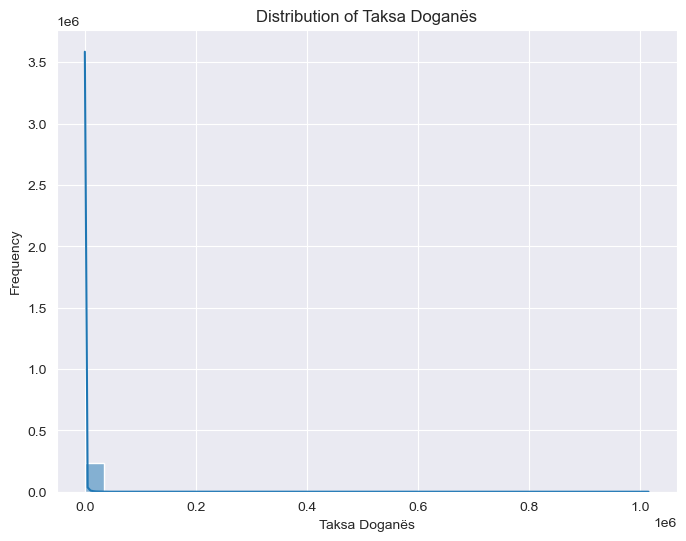

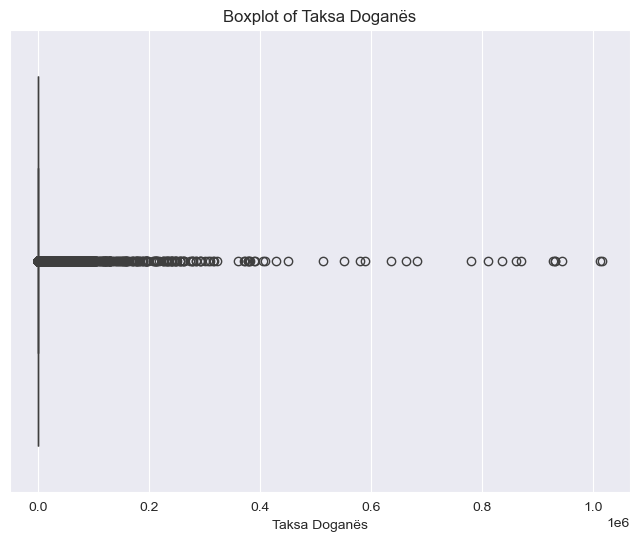

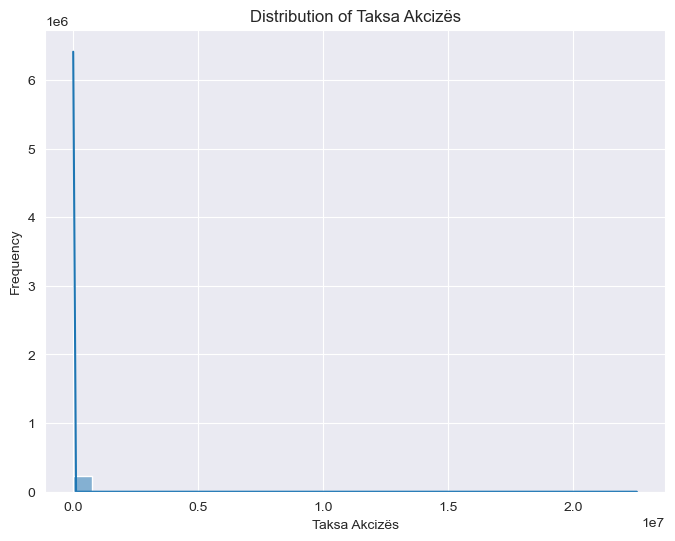

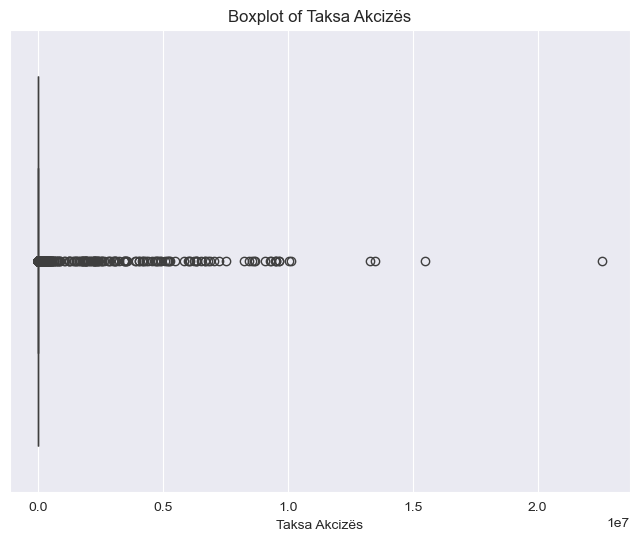

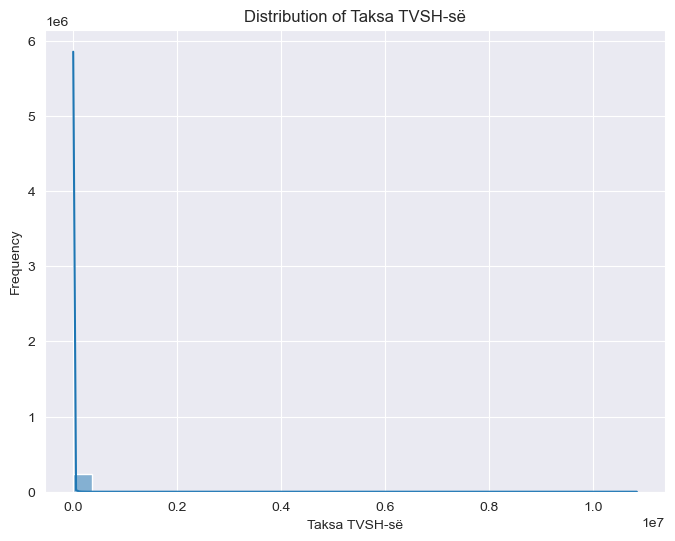

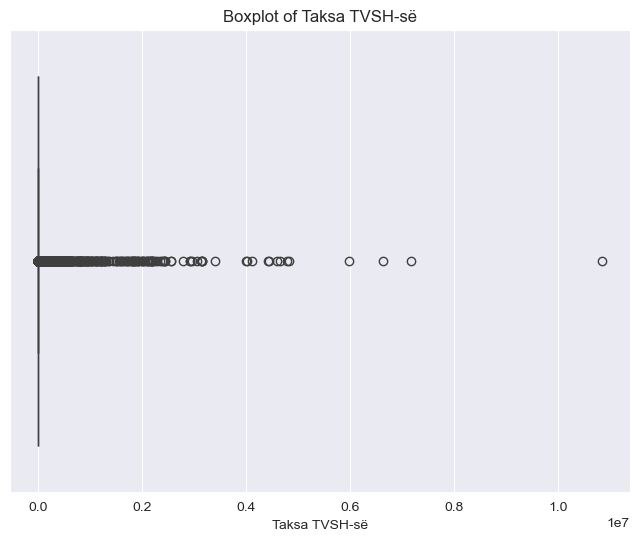

In [59]:
float_columns = ['Sasia', 'Vlera Mallrave', 'Netweight', 'Taksa Doganës', 'Taksa Akcizës', 'Taksa TVSH-së']
for column in float_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot to check for outliers
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

Univariate Analysis for Object Columns

In [63]:
albanian_to_ascii = {
   'ë': 'e', 'Ë': 'E',
    'ç': 'c', 'Ç': 'C',
    'ë': 'e', 'Ë': 'E',
}

def replace_albanian_chars(text):
    for alb_char, ascii_char in albanian_to_ascii.items():
        text = text.replace(alb_char, ascii_char)
    return text


df['Kodi Tarifor'] = df['Kodi Tarifor'].apply(replace_albanian_chars)
df.head()

,VITI,MUAJI,Regjimi,Origjina,Kodi Tarifor,Sasia,Vlera Mallrave,Netweight,Taksa Doganës,Taksa Akcizës,Taksa TVSH-së
0,2024,1,IM4,CN - KINA,8807100090 - Helikat dhe rotoret dhe pjeset e ...,NaN,786.21,1.00,78.62,0.0,155.67
1,2024,1,IM4,PL - POLONIA,8529101190 - Antenat teleskopike dhe te tipit ...,NaN,20.18,0.60,2.02,0.0,4.00
2,2024,1,IM4,CN - KINA,8806229090 - Me peshen maksimale te ngritjes m...,NaN,23763.00,34.24,2376.30,0.0,4705.08
3,2024,1,IM4,BG - BULLGARIA,8413703090 - Pompat forcuese glandless per sis...,20.0,4896.05,295.00,0.00,0.0,0.00
4,2024,1,IM4,DE - GJERMANIA,"9405618090 - Shenjat e ndricimit, tabelat e nd...",NaN,3208.12,126.00,0.00,0.0,577.46


In [65]:
import matplotlib.pyplot as plt

# supports Unicode characters
plt.rcParams['font.family'] = 'DejaVu Sans'

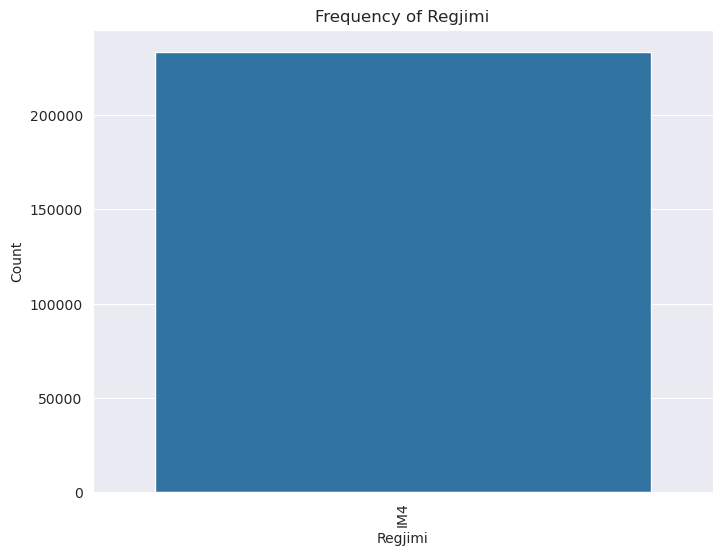

Category Counts for Regjimi:
Regjimi
IM4    233638
Name: count, dtype: int64

Category Percentages for Regjimi:
Regjimi
IM4    100.0
Name: proportion, dtype: float64


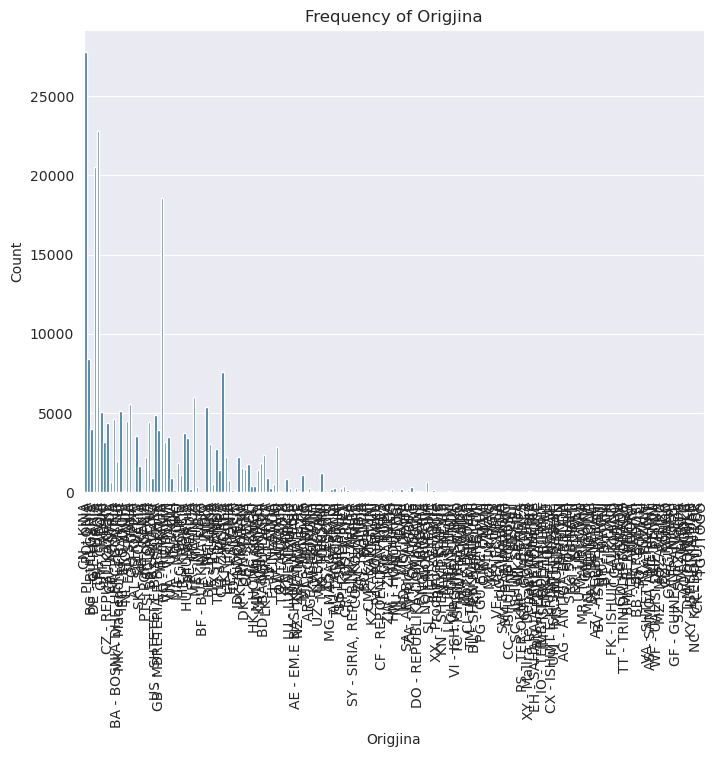

Category Counts for Origjina:
Origjina
CN - KINA              27784
TR - TURQIA            22811
DE - GJERMANIA         20510
IT - ITALIA            18573
PL - POLONIA            8393
                       ...  
SZ - SVAZILANDA            1
DM - DOMINIKA              1
DJ - GJIBUTI               1
NC - KALEDONIA E RE        1
TG - TOGO                  1
Name: count, Length: 194, dtype: int64

Category Percentages for Origjina:
Origjina
CN - KINA              11.891901
TR - TURQIA             9.763395
DE - GJERMANIA          8.778538
IT - ITALIA             7.949477
PL - POLONIA            3.592309
                         ...    
SZ - SVAZILANDA         0.000428
DM - DOMINIKA           0.000428
DJ - GJIBUTI            0.000428
NC - KALEDONIA E RE     0.000428
TG - TOGO               0.000428
Name: proportion, Length: 194, dtype: float64


In [67]:
object_columns = ['Regjimi', 'Origjina']
for column in object_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Frequency of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

    category_counts = df[column].value_counts()
    category_percentages = df[column].value_counts(normalize=True) * 100
    print(f"Category Counts for {column}:")
    print(category_counts)
    print(f"\nCategory Percentages for {column}:")
    print(category_percentages)

# Bivariate Analysis

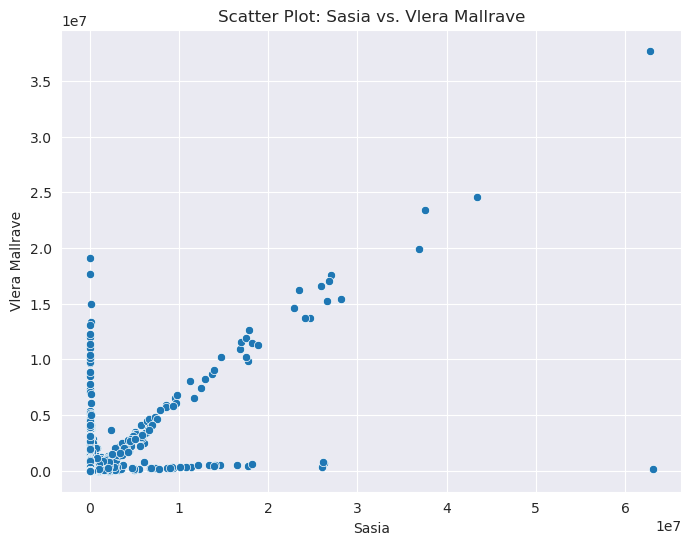

In [69]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sasia', y='Vlera Mallrave', data=df)
plt.title('Scatter Plot: Sasia vs. Vlera Mallrave')
plt.xlabel('Sasia')
plt.ylabel('Vlera Mallrave')
plt.show()

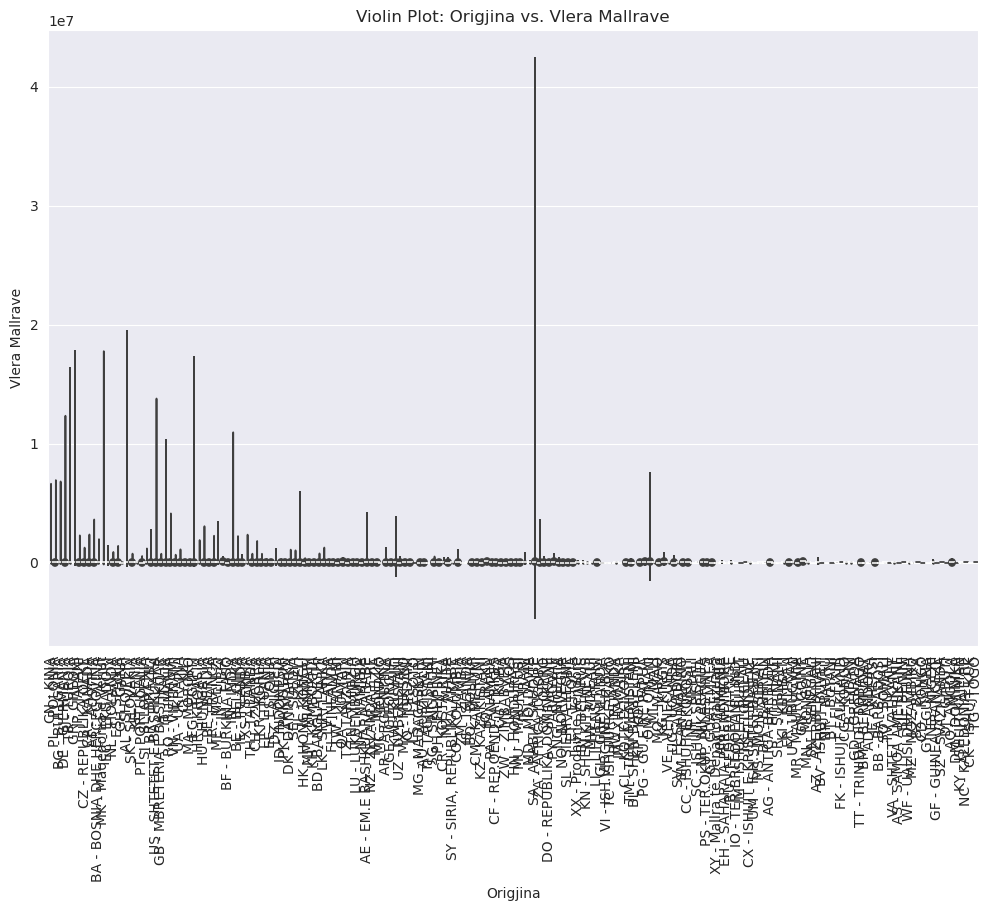

In [70]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Origjina', y='Vlera Mallrave', data=df)
plt.title('Violin Plot: Origjina vs. Vlera Mallrave')
plt.xlabel('Origjina')
plt.ylabel('Vlera Mallrave')
plt.xticks(rotation=90)
plt.show()

In [ ]:
numeric_cols = ['Sasia', 'Vlera Mallrave', 'Netweight', 'Taksa Doganës', 'Taksa Akcizës', 'Taksa TVSH-së']
df[numeric_cols] = df[numeric_cols].replace({',': ''}, regex=True).astype(float)

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [ ]:

plt.figure(figsize=(10, 6))
df.groupby('Origjina')['Vlera Mallrave'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Trade Value by Country')
plt.xlabel('Country')
plt.ylabel('Total Value of Goods')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
df.groupby('Kodi Tarifor')['Vlera Mallrave'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Tariff Codes by Trade Value')
plt.xlabel('Tariff Code')
plt.ylabel('Total Value of Goods')
plt.show()

In [ ]:
tax_columns = ['Taksa Doganës', 'Taksa Akcizës', 'Taksa TVSH-së']
total_taxes = df[tax_columns].sum()
plt.figure(figsize=(8, 6))
total_taxes.plot(kind='bar', stacked=True)
plt.title('Total Tax Contributions')
plt.xlabel('Tax Type')
plt.ylabel('Total Tax Amount')
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
distinct_origjina = df['Origjina'].unique()

print("Distinct values in 'Origjina':")
for index, value in enumerate(distinct_origjina, 1):
    print(f"{index}. {value}")

In [ ]:
distinct_origjina = df['Regjimi'].unique()

print("Distinct values in 'Regjimi':")
for index, value in enumerate(distinct_origjina, 1):
    print(f"{index}. {value}")

In [ ]:
distinct_origjina = df['Kodi Tarifor'].unique()

print("Distinct values in 'Kodi Tarifor':")
for index, value in enumerate(distinct_origjina, 1):
    print(f"{index}. {value}")

In [ ]:
missing_values = df.isnull().sum()
missing_values

In [ ]:
total_dataset = np.prod(df.shape)
total_missing = missing_values.sum()
percent = (total_missing / total_dataset) * 100
percent

In [ ]:
# Calculate and display missing values and their percentage, sorted by percentage
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data_sorted = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=True)

print("\nMissing values in the dataset:\n", missing_data_sorted)

In [ ]:
# taking the numerical columns
numeric_columns1 = df.select_dtypes(include=[np.number]).columns

for column in numeric_columns1:
    plt.figure(figsize=(14, 7))
    
    # Subplot 1: Kernel Density Estimation Plot
    plt.subplot(1, 2, 1)
    plt.title(f"{column} - Almost Normal Distribution", fontsize=15)
    sns.kdeplot(data=df[column], fill=True, color="blue", warn_singular=False)
    
    # Subplot 2: Box Plot
    plt.subplot(1, 2, 2)
    plt.title(f"{column} - Skewed Distribution", fontsize=15)
    sns.boxplot(data=df[column], orient="h")
    
    plt.tight_layout()
    plt.show()

In [ ]:
def detect_outliers_with_plot(df):
   
   #taking the numeric columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    
    #making a copy of the dataset
    df_cleaned = df.copy()
    
    plt.figure(figsize=(15, 10))
    
    for i, col in enumerate(numeric_columns, 1):
        # Calculate Quartiles and IQR
        
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        
        IQR = Q3 - Q1
        
        # Determine outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
        
        # for each column a boxplot is created using Seaborn's boxplot function to visualize the distribution of the cleaned data (after outliers are removed)
        plt.subplot(2, len(numeric_columns) // 2 + 1, i)
        sns.boxplot(x=df_cleaned[col])
        plt.title(f'Boxplot për {col}')
    
    plt.tight_layout()
    plt.show()
    
    return df_cleaned

df_cleaned = detect_outliers_with_plot(df)

In [ ]:
# Calculation of the first and third quartiles
Q1 = df['Sasia'].quantile(0.25)  # 25% percentile (Q1)
Q3 = df['Sasia'].quantile(0.75)  # 75% percentile (Q3)
IQR = Q3 - Q1  # Interquartile Range (IQR), which is the difference between Q3 and Q1

# Detecting outliers
outliersSasia = df[(df['Sasia'] < (Q1 - 1.5 * IQR)) | (df['Sasia'] > (Q3 + 1.5 * IQR))]
# Filter rows where Sasia is less than the lower bound or greater than the upper bound of the IQR

print("Numri i zbulimeve jo të sakta:", len(outliersSasia))  

In [ ]:
# Correlation between numerical columns
df_cleaned.corr(numeric_only=True)

In [ ]:
# Histogram for data distribution before cleaning
df['Netweight'].hist(bins=20)  # Creating a histogram for 'Netweight' before cleaning with 20 bins
plt.title('Histogram of Netweight')  
plt.xlabel('Netweight') 
plt.ylabel('Frequency') 
plt.show() 

# Histogram for data distribution after cleaning
df_cleaned['Netweight'].hist(bins=20)  # Creating a histogram for 'Netweight' after cleaning with 20 bins
plt.title('Histogram of Netweight')  
plt.xlabel('Netweight') 
plt.ylabel('Frequency') 
plt.show() 

In [ ]:
# Heatmap for correlation between numeric columns
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [ ]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number])  # keep only numerical columns
    # Remove columns that would lead to df being singular
    df = df.dropna(axis=1)  # drop columns with any missing values
    df = df[[col for col in df if df[col].nunique() > 1]]  # keep columns with more than 1 unique value
    columnNames = list(df)
    if len(columnNames) > 10:  # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
plotScatterMatrix(df_cleaned, 20, 10)

To do:
# me i transformu keto shtet ne shkurtesa 
# me i trasformu produktet vetem me kode